In [1]:
# MLP for the IMDB problem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# Import the backend
from keras import backend as K
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(path='/Users/laurenwashington/Downloads/imdb.npz',
                                                      num_words= top_words,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

Training data: 
(50000,)
(50000,)
Classes: 
[0 1]
Number of words: 
4998
Review length: 
Mean 234.76 words (172.911495)


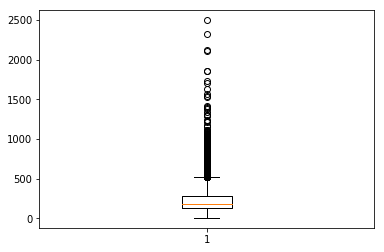

In [3]:
#combine X and Y
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

# Summarize number of classes
print("Classes: ")
print(np.unique(y))

# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [5]:
#This function transforms a list of num_samples sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps). 
#num_timesteps is either the maxlen argument if provided, or the length of the longest sequence otherwise.
#Sequences that are shorter than num_timesteps are padded with value at the end.
#Sequences longer than num_timesteps are truncated so that they fit the desired length. The position where padding or truncation happens 
#is determined by the arguments padding and truncating, respectively.
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [6]:
#add layers via the .add() method
#compile configures the model for training.
#Embedding Turns positive integers (indexes) into dense vectors of fixed size. eg. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]
#This layer can only be used as the first layer in a model. The model will take as input an integer matrix of size (batch, input_length).
#Flatten flattens the input. Does not affect the batch size (amount of data each iteration in an epoch sees)

#Dense: regular densely-connected NN layer.
#The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model 
#(and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. 
#activation: Activation function to use (see activations). If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
#relu Rectified Linear Unit.
#sigmoid activation function
#model.summary prints a summary representatioon of your model

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=32, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
 - 68s - loss: 0.4096 - acc: 0.7931 - val_loss: 0.3533 - val_acc: 0.8460
Epoch 2/2
 - 71s - loss: 0.1317 - acc: 0.9513 - val_loss: 0.3957 - val_acc: 0.8549
Accuracy: 85.49%
